Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Hands On Activity 6.2: Training Neural Networks**
**Name** | Gamundoy, Jon Aviv Cloydd S.
**Section** | CPE32S3
**Date Performed**: | 3/28/2024
**Date Submitted**: | 4/01/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
24,11,143,94,33,146,36.6,0.254,51,1
553,1,88,62,24,44,29.9,0.422,23,0
455,14,175,62,30,0,33.6,0.212,38,1
607,1,92,62,25,41,19.5,0.482,25,0
45,0,180,66,39,0,42.0,1.893,25,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 12)                108       
                                                                 
 dense_45 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 13ms/step - loss: 0.8517 - accuracy: 0.3455 - val_loss: 0.8056 - val_accuracy: 0.3594
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7891 - accuracy: 0.3455 - val_loss: 0.7561 - val_accuracy: 0.3542
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.7444 - accuracy: 0.3247 - val_loss: 0.7211 - val_accuracy: 0.3750
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.3594 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5729 - val_loss: 0.6795 - val_accuracy: 0.5885
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6742 - accuracy: 0.6493 - val_loss: 0.6671 - val_accuracy: 0.6302
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.6510 - val_loss: 0.6579 - val_accuracy: 0.6302
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


## Author's note: `.predict_classes()` has been omitted from TensorFlow starting from version 2.6. The following has been used to remedy this: `(model.predict(x_test) > 0.5).astype("int32")`

[Source 1](https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes)

[Source 2](https://stackoverflow.com/questions/51382524/what-is-the-difference-between-predict-and-predict-class-functions-in-keras)

In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.47061905],
       [0.6784095 ],
       [0.30403063],
       [0.31542656],
       [0.17722523],
       [0.50674564],
       [0.08729361],
       [0.36328804],
       [0.7782391 ],
       [0.2397484 ]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.745
roc-auc is 0.820


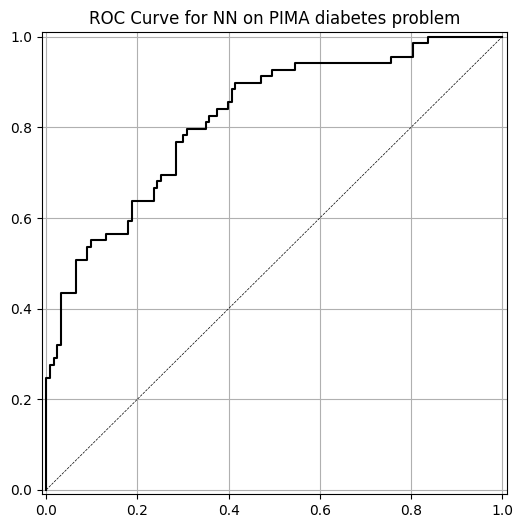

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

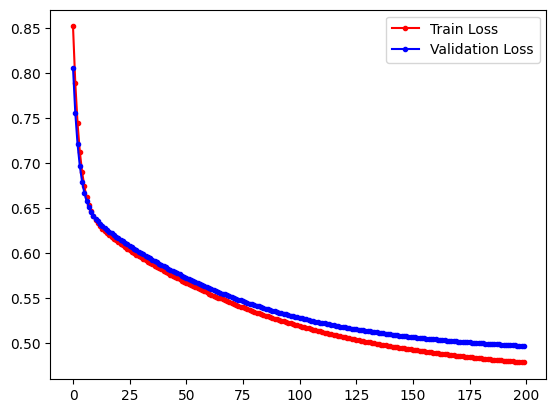

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

# Answer:

Based on the graph, we can say that the training data has reached a higher accuracy than the validation data due to their loss. The training data has achieved approximately 0.45 loss by the 200 epoch while the validation data only managed to reach approximately 0.50 loss in the same epoch.

We can also say that the model is learning since the loss of both training and validation datasets decreases as the epoch number increases. Although at a certain point, roughly 100 epochs, we can say that the model slowly struggles to learn or 'reached a limit' as the loss does not get any lower for the validation dataset.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
# Building the model (2 hidden layers with 6 nodes (relu) each | 1 output layer with 1 node (sigmoid))
model_supp  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Veiew the model summary
model_supp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the modle and use a learning rate of 0.003
model_supp.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])

# Fit the model and train for 1,500 epochs
run_hist_supp = model_supp.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 2s 30ms/step - loss: 0.7231 - accuracy: 0.5694 - val_loss: 0.7073 - val_accuracy: 0.6042
Epoch 2/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.7127 - accuracy: 0.6042 - val_loss: 0.6980 - val_accuracy: 0.6406
Epoch 3/1500
18/18 [==============================] - 0s 11ms/step - loss: 0.7033 - accuracy: 0.6111 - val_loss: 0.6896 - val_accuracy: 0.6510
Epoch 4/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.6250 - val_loss: 0.6820 - val_accuracy: 0.6615
Epoch 5/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.6337 - val_loss: 0.6752 - val_accuracy: 0.6719
Epoch 6/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.6798 - accuracy: 0.6441 - val_loss: 0.6689 - val_accuracy: 0.6771
Epoch 7/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.6731 - accuracy: 0.6493 - val_loss: 0.6629 - val_accuracy: 0.6823
Epoc

In [ ]:
y_pred_class_nn_supp = (model_supp.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_supp = model_supp.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


accuracy is 0.786
roc-auc is 0.814


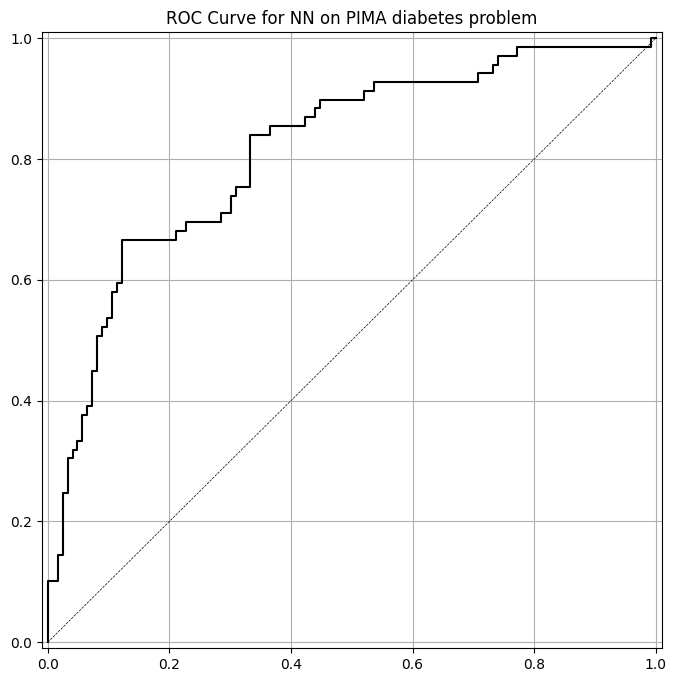

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_supp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_supp)))

plot_roc(y_test, y_pred_prob_nn_supp, 'NN')

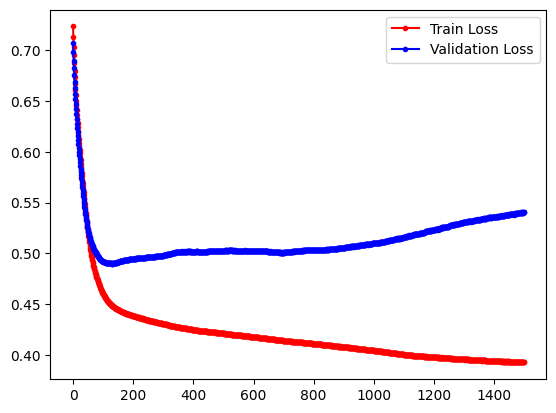

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_supp.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_supp.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Testing Area for different learning rates/epochs

##### Network Structure

In [ ]:
# Building the model (2 hidden layers with 6 nodes (relu) each | 1 output layer with 1 node (sigmoid))
model_test  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

##### Compilation

In [ ]:
# Compile the modle and use a learning rate of 0.003
model_test.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])

# Fit the model and train for 1,500 epochs
run_hist_test = model_test.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 23ms/step - loss: 0.7025 - accuracy: 0.3958 - val_loss: 0.6947 - val_accuracy: 0.5208
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.4913 - val_loss: 0.6898 - val_accuracy: 0.6094
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6910 - accuracy: 0.5781 - val_loss: 0.6855 - val_accuracy: 0.6302
Epoch 4/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6862 - accuracy: 0.6111 - val_loss: 0.6817 - val_accuracy: 0.6250
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6820 - accuracy: 0.6302 - val_loss: 0.6783 - val_accuracy: 0.6250
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.6458 - val_loss: 0.6754 - val_accuracy: 0.6250
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.6406 - val_loss: 0.6727 - val_accuracy: 0.6458
Epoch 8/10

##### Plotting

In [ ]:
y_pred_class_nn_test = (model_test.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_test = model_test.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


accuracy is 0.646
roc-auc is 0.749


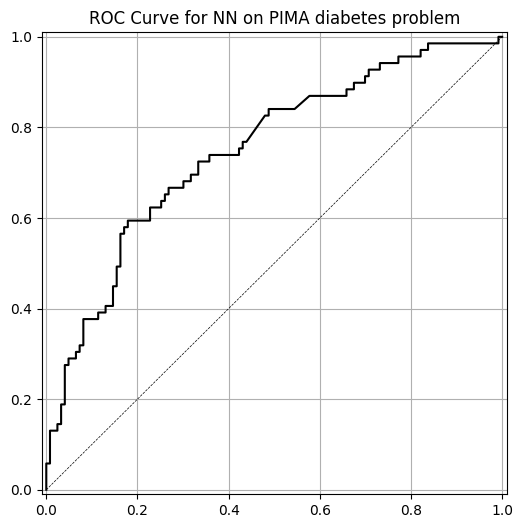

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_test)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_test)))

plot_roc(y_test, y_pred_prob_nn_test, 'NN')

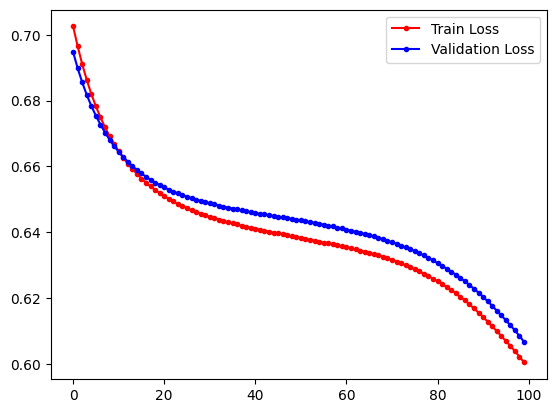

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_test.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_test.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

## Documentation

[Link for testing documentation](https://docs.google.com/document/d/1FdGThwWNpkHd1il9sECP0v71NzV81BCIkMgpLCpOC-c/edit?usp=sharing)

#### Conclusion

# Answer

From this activity, I have learned about the different factors affecting neural networks and their contribution to the model's accuracy and fitting. Based on the [documentation](https://docs.google.com/document/d/1FdGThwWNpkHd1il9sECP0v71NzV81BCIkMgpLCpOC-c/edit?usp=sharing), I have noticed that the learning rate of `0.006` does not provide a good model and often results in overfitting with the validation loss being significantly higher than training loss. This is also true when implementing a network structure consisting of 12 neurons, regardless of number of layers.

This might be because implementing a high learning rate encourages the model to overfit by adjusting its weights accordingly to 'learn' the training data, but when presented with the testing dataset, the model cannot generalize its 'learnings'. As for the neuron count, overfitting might have occured due to the complexity of the system trying to solve a simpler problem.

Upon testing, the most well-fit model created is by using a learning rate of `0.003`, `2 hidden layers` consisting of `6 neurons` each with the `relu` activation function, `1 output layer` consisting of `1 neuron` with the `sigmoid` activation function, and `100 epochs`. This allows the model to learn and generalize information from the training dataset and trains the model just long enough before it starts to overfit the data. Although this model only yields roughly 60% accuracy, other models that reached a higher accuracy score are either overfitted or underfitted.